This notebook is for plotting of the simulated and observed buoy data. One can run the individual cell blocks to plot and save the files in the respective folders of model runs. 

Let us start with loading the plotting and data reading modules. 

In [85]:
import importlib
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import plots
import readsimdata
import settings
import generalfunc as gf

In [109]:
#plotting parameters.
params = { "pgf.texsystem": "pdflatex",
           "pgf.preamble": [ r"\usepackage[utf8x]{inputenc}",
                             r"\usepackage[T1]{fontenc}",
                             r"\usepackage{cmbright}"],
            'legend.fontsize': '10',
            'axes.labelsize': '11',
            'axes.titlesize':'11',
            'xtick.labelsize':'11',
            'ytick.labelsize':'11',
            "font.weight":'bold'}
plt.rcParams.update(params)

The first step is to give the buoy name in the variable $Bnum$. The options are $[02,03,09,13,14,16]$ given as string inputs. Following this, we need the folder where the data is stored. 

In [147]:
importlib.reload(settings)
Bnum='16'
bname='BUOY_'+Bnum
s=settings.settings()
forcevec=settings.forcevec;h=s['h'];trate=s['trate']
(forcenam,folname)=gf.forcedetail(forcevec,trate,h)
print(folname)
loc='../../generated_data/'+bname+'/'+folname+'/'
#or get another folder name from the buoy folder.

h1f1A1T1O1Po1Pt1Bf0


Now we run a function from the module $readsimdata$ to obtain a dictionary of all the simulated and observed data useful for plotting.

In [148]:
importlib.reload(readsimdata)
SD=readsimdata.readsimdata(Bnum,folname)

In [149]:
#Transformation of a time vector to remove the year component from it. As we know all the buoys were in 2014.
Ti=SD['T']
T=[]
for i in range(len(Ti)):
    elem=(Ti[i][0:4]+Ti[i][9:15]).replace('-','/')
    T=np.append(T,elem)

Now we have a dictionary containing all the datasets we need. Let's get into plotting. The first easy one we would like to do is plot for simulated velocities. 

In [150]:
importlib.reload(plots)
#Uis is sim and Uib is observed buoy
Uis=SD['Uis'];Vis=SD['Vis']
Uisvec=np.column_stack((Uis,Vis))
Uib=SD['Uib'];Vib=SD['Vib']
Uibvec=np.column_stack((Uib,Vib))
plots.plticevel(Uisvec,Uibvec,T,loc)

Next we try and plot the fourier transforms of longitude and latitude time series and the velocity time series.

In [151]:
importlib.reload(plots)
#time in hours for FT
Tft=SD['Tft']
argtide=SD['tidearg'];argcor=SD['corarg']
argval=np.append(Tft[argtide],Tft[argcor])
# X and Y amplitudes (lon and lat)
units='deg'
Lonsft=np.row_stack((SD['Xsam'],SD['Xsph']))
Lonbft=np.row_stack((SD['Xbam'],SD['Xbph']))
# plot for longitude.
plots.pltFT(loc,'LongitudeFT',Lonsft,Lonbft,units,Tft,argval)
# latitude
Latsft=np.row_stack((SD['Ysam'],SD['Ysph']))
Latbft=np.row_stack((SD['Ybam'],SD['Ybph']))
# plot for longitude.
plots.pltFT(loc,'LatitudeFT',Latsft,Latbft,units,Tft,argval)
#Velocity
units='m/s'
Usft=np.row_stack((SD['Usam'],SD['Usph']))
Ubft=np.row_stack((SD['Ubam'],SD['Ubph']))
# plot for u velocity
plots.pltFT(loc,'U-FT',Usft,Ubft,units,Tft,argval)
Vsft=np.row_stack((SD['Vsam'],SD['Vsph']))
Vbft=np.row_stack((SD['Vbam'],SD['Vbph']))
# plot for u velocity
plots.pltFT(loc,'V-FT',Vsft,Vbft,units,Tft,argval)

Plotting the amplitude and phases from the fourier transforms gives a nice idea of which are the dominant frequencies of the sea ice motion. And as expected, it is indeed the M2 tidal frequencies. Next we try and see the velocity plots of the residuals of the sea ice observed and simulated motion. By resdiuals we mean that the plots of velocity vectors where the mean drift is subtracted from it.

In [152]:
# tidal velocity plots.
# time res vector based on numtaps
numtaps=2*24*2+1
fedge=int(numtaps/2)
Tres=T[fedge:-fedge]
Usres=SD['Usres'];Vsres=SD['Vsres']
Ubres=SD['Ubres'];Vbres=SD['Vbres']


In [153]:
importlib.reload(plots)
midindex=288*7  #this is index for splitting the quiver plot. It varies per buoy.
ylim=0.9 #this is the y axis limit in the graph.
labelname=['imodel','obs']
name='icemodel-obs'
Coru=scipy.stats.pearsonr(Ubres,Usres)
Corv=scipy.stats.pearsonr(Vbres,Vsres)
# print(Coru,Corv)
plots.pltvelquiver(loc,name,Tres,midindex,ylim,Usres,Vsres,Ubres,Vbres,Coru,Corv,labelname)

In [154]:
# reading tidal data of GTSM from the main buoy file.
obsfil='../../generated_data/'+bname+'/Pos_Vel_data.xlsx'
obsdf=pd.read_excel(obsfil)
Ut=obsdf['Ut'];Vt=obsdf['Vt']
Uts=Ut[fedge:-fedge];Vts=Vt[fedge:-fedge]


In [155]:
name='GTSM currents-obs'
labelname=['gtsm','obs']
Coru=scipy.stats.pearsonr(Ubres,Uts)
Corv=scipy.stats.pearsonr(Vbres,Vts)
print(Coru,Corv)
plots.pltvelquiver(loc,name,Tres,midindex,ylim,Uts,Vts,Ubres,Vbres,Coru,Corv,labelname)
name='GTSM currents-ice model'
labelname=['gtsm','imodel']
Coru=scipy.stats.pearsonr(Usres,Uts)
Corv=scipy.stats.pearsonr(Vsres,Vts)
print(Coru,Corv)
plots.pltvelquiver(loc,name,Tres,midindex,ylim,Uts,Vts,Usres,Vsres,Coru,Corv,labelname)

(0.8604707964393101, 0.0) (0.8327000294320513, 0.0)
(0.9028293175269597, 0.0) (0.8216854748105126, 0.0)


In [25]:
Bnum='09'
bname='BUOY_'+Bnum

In [26]:
#Pressure gradients sensitivity.
locposvel='../../generated_data/'+bname+'/Pos_Vel_data.xlsx'
df=pd.read_excel(locposvel,'PGs')
df2=pd.read_excel(locposvel,'Sheet1')
Pgxt=df['Pgxt'];Pgyt=df['Pgyt']
Pgxtr=df['Pgxtr'];Pgytr=df['Pgytr']
Pgxtl=df['Pgxtl'];Pgytl=df['Pgytl']
Fgxt=df2['Fpgx'];Fgyt=df2['Fpgy']
H=df2['WDt'];h=df2['ssht']
Hb=H-h

diffx_fg=Pgxt-Fgxt;diffy_fg=Pgyt-Fgyt
diffx=((Pgxtr-Pgxtl));diffy=abs((Pgytr-Pgytl))
print((diffx))

0       2.619814e-07
1       2.653540e-07
2       2.585404e-07
3       2.411993e-07
4       1.953504e-07
            ...     
1619    1.783664e-07
1620    1.893585e-07
1621    2.281271e-07
1622    2.780398e-07
1623    2.580809e-07
Length: 1624, dtype: float64


In [102]:
Uog=df2['Uog'];Vog=df2['Vog']
Ut=df2['Ut'];Vt=df2['Vt']
Uib=df2['Uib'];Ua=df2['Ua'];Uo=df2['Uo']
Vib=df2['Vib']
alpha=(Uib-Uo-Ut)/Ua

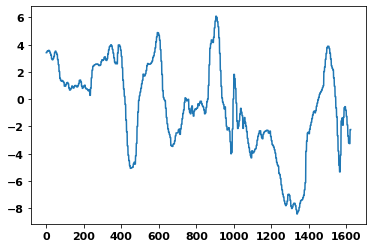

In [110]:
# plt.plot(Uog,'red')
# plt.plot(Ut,'green')
# plt.plot(Uib-(Ut+Uo)[300:400])
plt.plot(Ua[:])

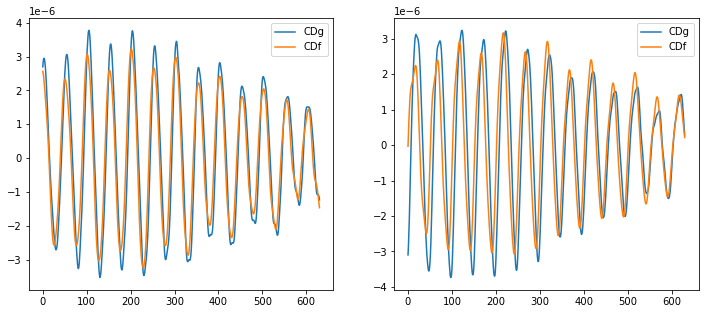

In [45]:
llim=0;ulim=-1
fig=plt.figure(figsize=(12,5))
ax=plt.subplot(1,2,1)
ax.plot(Pgxt[llim:ulim],label='CDg')
ax.plot(Fgxt[llim:ulim],label='CDf')
# ax.plot(Pgxtr,label='FD')
# ax.plot(Pgxtl,label='BD')
# ax.plot(diffx[llim:ulim],label='sens')
# ax.plot(diffx_fg[llim:ulim],label='g-f')
plt.legend(loc=1)
ax=plt.subplot(1,2,2)
ax.plot(Pgyt[llim:ulim],label='CDg')
ax.plot(Fgyt[llim:ulim],label='CDf')
# ax.plot(Pgytr,label='FD')
# ax.plot(Pgytl,label='BD')
# ax.plot(diffy[llim:ulim]*100,label='sens')
# ax.plot(diffy_fg[llim:ulim],label='g-f')
plt.legend(loc=1)
# plt.savefig('../../generated_data/'+bname+'/pgdifflo0.12la0.01.jpg')
plt.show()

In [47]:
print(Fgxt[632])
print(Fgyt[632])
-1.55204E-06	1.42501E-08


KeyError: 632

In [72]:
#compute gradient of water depth. 
Xib=df2['Xib'];Yib=df2['Yib']
dHdxvec=[];dHdyvec=[];
for j in range(len(Xib)-1):
    dlon=Xib[j+1]-Xib[j]
    dlat=Yib[j+1]-Yib[j]
    dH=H[j+1]-H[j]
    lat=Yib[j];lon=Xib[j]
    dlatm=111.32e03*dlat;dlonm=111.32e03*dlon/4.
    dHdx=dH/dlonm;dHdy=dH/dlatm
    dHdxvec=np.append(dHdxvec,dHdx)
    dHdyvec=np.append(dHdyvec,dHdy)

C:\Users\vasulkar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'bathymetry')

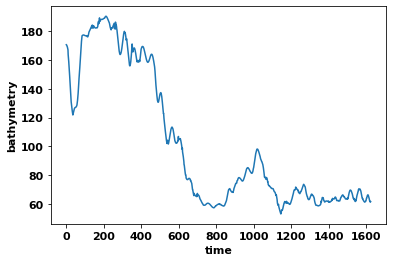

In [132]:
plt.plot(Hb[:])
plt.xlabel('time',fontweight='bold')
plt.ylabel('bathymetry',fontweight='bold')